"Geo Data Science with Python" 
### Notebook Exercise 6e

---

# Downloading Science Data with pydap

If you work in teams, please indicate your colaborators below!

In [1]:
NAME = ""
COLLABORATORS = ""

<div class="alert alert-warning">

Exercise 06e
    
total points: 20/20
    
    
See further notes below. If there are no comments, everything is correct or I had no specific suggestion to offer.

    
</div>

---
# Task description for working with pydap

(20 points)

- On the OPeNDAP test server: http://test.opendap.org/dap/data/nc, find the file: 20070917-MODIS_A-JPL-L2P-A2007260000000.L2_LAC_GHRSST-v01.nc

- Generate a download URL, only for the lat, lon, time and sea_surface_temperature variables
- Use the pydap package to connect to and inspect the dataset
- Using pydap, write code to answer the questions:
    - What is the shape of the sea_surface_temperature variable?
    - What is the code to retrieve the fill value of the dataset?
    - What is the shape of the lat/lon variables?
    - What is the code for downloading only the first 500x500 datapoints from all variables?
    - Would you need to create a meshgrid to plot the variable?

- Write a **decent** report below your code, answering all the qustions (up to you if you want to use only markup cells or a combination of code and markup cells.
- Make a simple plot of the 500x500 subset of the sst variable with plt.scatter()


In [2]:
from pydap.client import open_url
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# assigning custom 'data' from url to a variable
data = open_url ('http://test.opendap.org/opendap/hyrax/data/nc/20070917-MODIS_A-JPL-L2P-A2007260000000.L2_LAC_GHRSST-v01.nc?lat[0:1:2029][0:1:1353],lon[0:1:2029][0:1:1353],sea_surface_temperature[0:1:0][0:1:2029][0:1:1353]')

# checking details of sea temp
sst = data.sea_surface_temperature
sst.dimensions
sst.shape

# fillVal = data._FllValue

data.lon.shape
data.lat.shape
data.attributes

# fill value for all variables
fillVal_sst = sst._FillValue
fillVal_lon = data.lon._FillValue
fillVal_lat = data.lat._FillValue

# download a subset of the data
lon = data.lon[0:500,0:500].data
lat = data.lat[0:500,0:500].data
temp = sst[0,0:500,0:500].data


In [4]:
# lon[lon==fillVal_lon] = np.nan
# lat[lat==fillVal_lat] = np.nan
# temp[temp==fillVal_sst] = np.nan

 ## Brief Report
 The file '<i>20070917-MODIS_A-JPL-L2P-A2007260000000.L2_LAC_GHRSST-v01.nc</i>' was modfied to contain only latituted, longitude and sea surface temperature (sst) as keys. 
 It had several attributes as well. The shape of the sst variable was `(1,2030,1354)`, and the value `-32767`was used in place of missing entries. 
 The lat and lon variables both had shapes of `(2030, 1354)`. The fill value for lat is `-639.0`and for long it is `-999.0`
 The first 500x500 datapoints of each variable were extracted. 
 Since the coordinate variables (lat and lon) were 2D arrays, a meshgrid was not required. A simple plot of the data using the plt.scatter method is found below. 
 data.lon.attributes 

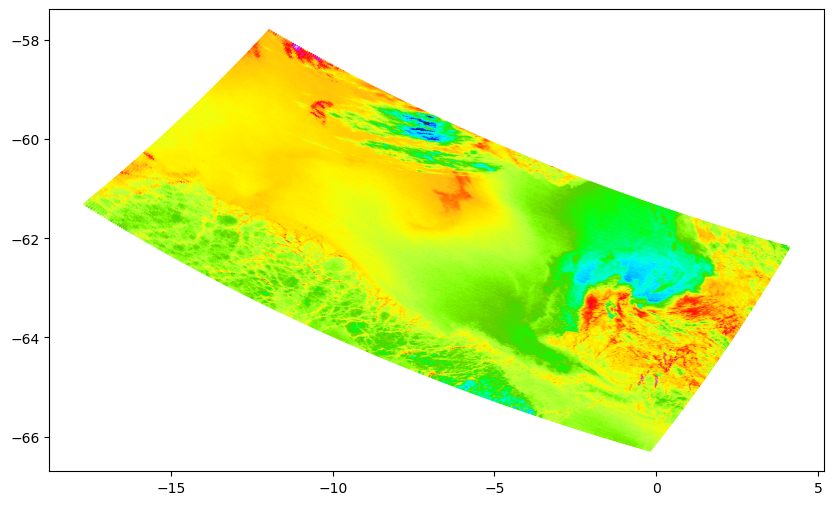

In [5]:
fig = plt.figure (figsize = (10,6))
plt.scatter (lon,lat, c=temp, cmap = 'gist_ncar', s=0.5)
plt.show()